# Lab 2.02 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

# importing android persistence
android = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/android_persistence_cpu.csv', sep=';')

# to categorical data
persistenceType = CategoricalDtype(categories=['Sharedpreferences', 'GreenDAO', 'SQLLite', 'Realm'], ordered=False)

dataSizeType = CategoricalDtype(categories=['Small', 'Medium', 'Large'],ordered=True)

android.PersistenceType = android.PersistenceType.astype(persistenceType)
android.DataSize = android.DataSize.astype(dataSizeType)

# showing head
android.head()

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

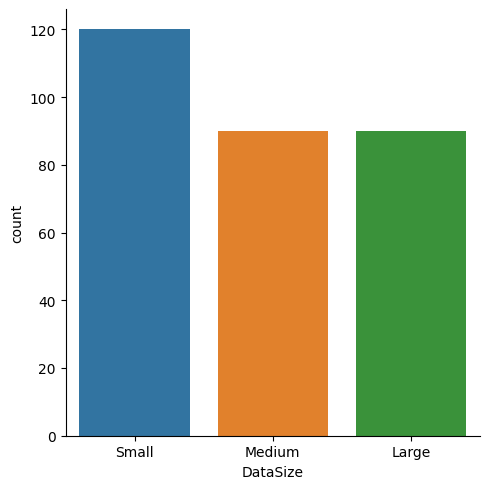

In [9]:
sns.catplot(data=android, x="DataSize", kind="count")

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

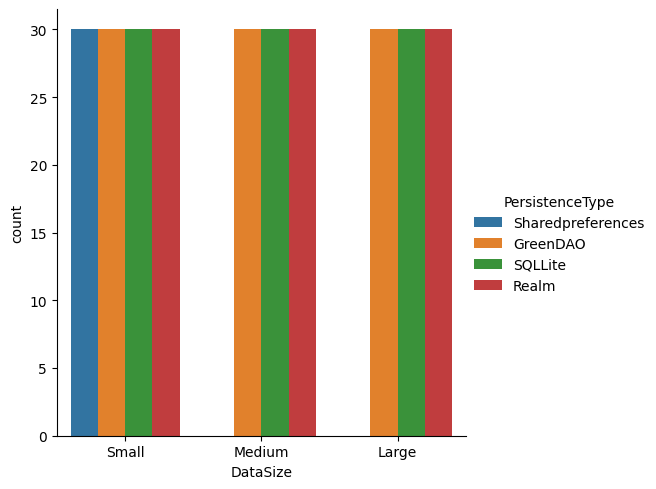

In [14]:
sns.catplot(data=android, hue="PersistenceType", kind="count", x="DataSize")

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

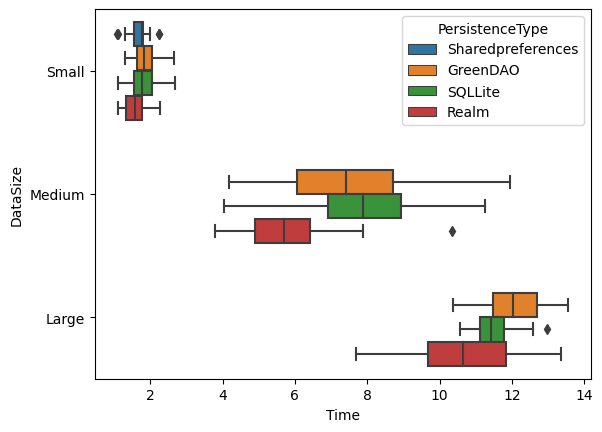

In [18]:
sns.boxplot(data=android, x="Time", y="DataSize", hue="PersistenceType")

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

TypeError: 'Axes' object is not callable

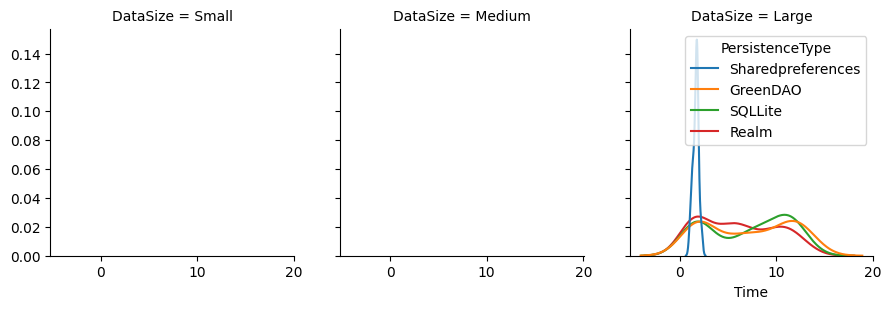

In [24]:
g= sns.FacetGrid(data=android, col="DataSize")
g.map(sns.kdeplot(data=android,x="Time", hue="PersistenceType"))

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [36]:
print("Time")
print(f"mean: \t \t \t {round(android.Time.mean(),3)}")
print(f"Standard deviation: \t {round(android.Time.std(),3)}")

print("\n"+"*"*50+"\n")



Time
mean: 	 	 	 6.231
Standard deviation: 	 4.23

**************************************************



In [61]:
android[["Time", "PersistenceType","DataSize"]].groupby(["PersistenceType","DataSize"]).mean()

Time
PersistenceType   DataSize           
Sharedpreferences Small      1.673667
                  Medium          NaN
                  Large           NaN
GreenDAO          Small      1.893667
                  Medium     7.454000
                  Large     12.110333
SQLLite           Small      1.799000
                  Medium     7.794000
                  Large     11.515000
Realm             Small      1.599000
                  Medium     5.818000
                  Large     10.651667

In [56]:
android[["Time", "PersistenceType"]].groupby("PersistenceType").mean()
android[["Time", "PersistenceType"]].groupby("PersistenceType").std()

,Time
PersistenceType,
Sharedpreferences,0.285192
GreenDAO,4.385917
SQLLite,4.146336
Realm,3.884175


In [73]:
print(np.round(android.Time.agg([np.mean, np.std]), 3))

an1 = android.groupby("DataSize")
print(np.round(an1.Time.agg([np.mean, np.std]), 3))

an2 = android.groupby("PersistenceType")
print(np.round(an2.Time.agg([np.mean, np.std]), 3))

an3 = android.groupby(["DataSize","PersistenceType"])
print(np.round(an3.Time.agg([np.mean, np.std]), 3))

mean    6.231
std     4.230
Name: Time, dtype: float64
            mean    std
DataSize               
Small      1.741  0.359
Medium     7.022  1.864
Large     11.426  1.164
                    mean    std
PersistenceType                
Sharedpreferences  1.674  0.285
GreenDAO           7.153  4.386
SQLLite            7.036  4.146
Realm              6.023  3.884
                              mean    std
DataSize PersistenceType                 
Small    Sharedpreferences   1.674  0.285
         GreenDAO            1.894  0.348
         SQLLite             1.799  0.416
         Realm               1.599  0.315
Medium   Sharedpreferences     NaN    NaN
         GreenDAO            7.454  2.007
         SQLLite             7.794  1.599
         Realm               5.818  1.331
Large    Sharedpreferences     NaN    NaN
         GreenDAO           12.110  0.868
         SQLLite            11.515  0.559
         Realm              10.652  1.406


mean    std
DataSize PersistenceType                 
Small    Sharedpreferences   1.674  0.285
         GreenDAO            1.894  0.348
         SQLLite             1.799  0.416
         Realm               1.599  0.315
Medium   Sharedpreferences     NaN    NaN
         GreenDAO            7.454  2.007
         SQLLite             7.794  1.599
         Realm               5.818  1.331
Large    Sharedpreferences     NaN    NaN
         GreenDAO           12.110  0.868
         SQLLite            11.515  0.559
         Realm              10.652  1.406

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
